# Import Dependencies

We begin by importing the necessary libraries.

In [1]:
# Data analysis
import numpy as np
import pandas as pd
pd.options.display.max_columns = 100
from scipy.stats import bootstrap

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Analysis

We proceed with our analyses by reading in the Gestation dataframe from the R mosaicData package. Note that a separate R script was used to export the dataframe into a csv file.

In [3]:
# Read data
df = pd.read_csv('../data/gestation_df.csv')
# Drop duplicate column
df.drop(['Unnamed: 0'], axis=1, inplace=True)
# Display first 5 rows
df.head()

,id,pluralty,outcome,date,gestation,sex,wt,parity,race,age,ed,ht,wt.1,drace,dage,ded,dht,dwt,marital,inc,smoke,time,number
0,15,single fetus,live birth,1964-11-11,284.0,male,120,1,asian,27.0,College graduate,62.0,100.0,asian,31.0,College graduate,65.0,110.0,married,2500-5000,never,never smoked,never
1,20,single fetus,live birth,1965-02-07,282.0,male,113,2,white,33.0,College graduate,64.0,135.0,white,38.0,College graduate,70.0,148.0,married,10000-12500,never,never smoked,never
2,58,single fetus,live birth,1965-04-25,279.0,male,128,1,white,28.0,HS graduate--no other schooling,64.0,115.0,white,32.0,8th -12th grade - did not graduate,NaN,NaN,married,5000-7500,now,still smokes,1-4 per day
3,61,single fetus,live birth,1965-02-12,NaN,male,123,2,white,36.0,College graduate,69.0,190.0,white,43.0,HS+some college,68.0,197.0,married,20000-22500,"once did, not now",2 to 3 years ago,20-29 per day
4,72,single fetus,live birth,1964-11-25,282.0,male,108,1,white,23.0,College graduate,67.0,125.0,white,24.0,College graduate,NaN,NaN,married,2500-5000,now,still smokes,20-29 per day


The first task at hand is to use the bootstrap to generate and interpret a 95% confidence interval for the median age of mothers.

Let's begin by visualizing the sample distribution and computing the relevant sample statistic (median).

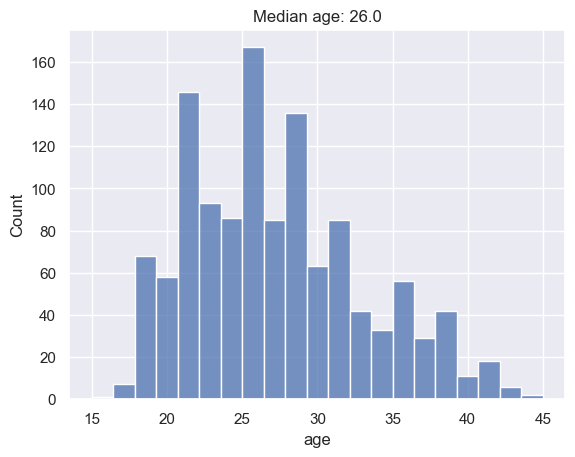

In [4]:
# Plot histogram
sns.histplot(df['age'])
# Compute median
plt.title(f'Median age: {df["age"].median()}')
# Display figure
plt.show()

As we can see, the data are normal with a median of 26. 

Next, generate 9999 bootstrapped samples via sampling with replacement, and compute a 95% CI for the median age. 

In [6]:
# Compute 95% bootstrapped CI for median
median_CI = bootstrap((df[df['age'].notnull()]['age'].to_list(),), 
                      np.median, 
                      confidence_level=0.95,
                      random_state=11, 
                      method='percentile')
# Display results
median_CI.confidence_interval

ConfidenceInterval(low=26.0, high=27.0)

This result implies that we are 95% confident that the true sample median lies between 26 and 27 (years old).

Moving onto the second task at hand: produce a contingency table of smoking vs race. We first perform a normalized value count on both columns, to get a better understanding of the data.

In [20]:
# Perform normalized value count on race
df['race'].value_counts(normalize=True).apply(lambda x: f'{x * 100:.2f}%')

white    71.14%
black    19.95%
asian     3.60%
mex       3.27%
mixed     2.04%
Name: race, dtype: object

In [21]:
# Perform normalized value count on smoke
df['smoke'].value_counts(normalize=True).apply(lambda x: f'{x * 100:.2f}%')

never                      44.37%
now                        39.48%
once did, not now           8.40%
until current pregnancy     7.75%
Name: smoke, dtype: object

It'd make sense to convert the smoking column into a binary variable, where 0 and 1 represent non-smokers and smokers, respectively. We'll choose to interpret values of "never" and "once did, not now" as non-smokers, whereas "now" and "until current pregnancy" will be grouped as smokers. 

In [22]:
# Map smoke to binary variable
df['smoke'] = df['smoke'].map({'never': 0,
                               'once did, not now': 0,
                               'now': 1,
                               'until current pregnancy': 1})

Finally, we can create our contingency table. 

In [23]:
# Create contingency table with margins
pd.crosstab(index=df['race'], columns=df['smoke'], margins=True)

smoke,0.0,1.0,All
race,,,
asian,31,12,43
black,129,113,242
mex,26,13,39
mixed,16,9,25
white,437,427,864
All,639,574,1213
